In [1]:
import pandas as pd
from pandas import Grouper
import seaborn as sns
import numpy as np
import datetime

df_raw =pd.read_csv('dataset.csv')
df_raw.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [2]:
len(df_raw)

35717

In [3]:
df_raw.dtypes

SystemCodeNumber    object
Capacity             int64
Occupancy            int64
LastUpdated         object
dtype: object

In [4]:
df_clean = df_raw.copy()
df_clean.LastUpdated = df_clean.LastUpdated.astype('datetime64')
df_clean['OccupationRate'] = df_clean.Occupancy / df_clean.Capacity *100
df_clean['date'] = df_clean.LastUpdated.dt.date
df_clean['date_time_halfhour'] = df_clean.LastUpdated.dt.round('30min')
df_clean['time'] = df_clean.date_time_halfhour.dt.time

In [5]:
df_clean.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,OccupationRate,date,date_time_halfhour,time
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,10.571924,2016-10-04,2016-10-04 08:00:00,08:00:00
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,11.091854,2016-10-04,2016-10-04 08:30:00,08:30:00
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,13.864818,2016-10-04,2016-10-04 09:00:00,09:00:00
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,18.544194,2016-10-04,2016-10-04 09:30:00,09:30:00
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,25.996534,2016-10-04,2016-10-04 10:00:00,10:00:00


In [6]:
df_clean.groupby('time').size()

time
07:30:00      30
08:00:00    2096
08:30:00    1971
09:00:00    1953
09:30:00    1983
10:00:00    1987
10:30:00    1985
11:00:00    1961
11:30:00    1988
12:00:00    1976
12:30:00    1982
13:00:00    1988
13:30:00    1958
14:00:00    1984
14:30:00    1989
15:00:00    1986
15:30:00    1985
16:00:00    1956
16:30:00    1959
dtype: int64

In [7]:
df_clean = df_clean[df_clean.time > datetime.time(7,30)]

In [8]:
len(df_clean)

35687

In [9]:
# drop duplicates
pre_len = len(df_clean)
df_clean = df_clean.drop_duplicates()

post_len = len(df_clean)

dropped_len = pre_len - post_len
print(dropped_len)

207


In [10]:
print('Minimum Percent Occupied: {:}'.format(df_clean.OccupationRate.min()))
print('Maximum Percent Occupied: {:}' .format(df_clean.OccupationRate.max()))

Minimum Percent Occupied: -1.6666666666666667
Maximum Percent Occupied: 104.1343669250646


In [11]:
# Limit Occupancy to the range of zero to Capacity
df_clean.Occupancy = df_clean.apply(lambda x: max(0, min(x['Capacity'], x['Occupancy'])), axis=1)
df_clean['OccupationRate'] = df_clean.Occupancy / df_clean.Capacity * 100
df_clean['OccupationRate'] = round(df_clean['OccupationRate'].astype(int), -1)

# Re-check range
print('Minimum Percent Occupied: {:}'.format(df_clean.OccupationRate.min()))
print('Maximum Percent Occupied: {:}'.format(df_clean.OccupationRate.max()))

Minimum Percent Occupied: 0
Maximum Percent Occupied: 100


In [12]:
df_clean.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,OccupationRate,date,date_time_halfhour,time
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,10,2016-10-04,2016-10-04 08:00:00,08:00:00
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,10,2016-10-04,2016-10-04 08:30:00,08:30:00
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,10,2016-10-04,2016-10-04 09:00:00,09:00:00
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,20,2016-10-04,2016-10-04 09:30:00,09:30:00
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,20,2016-10-04,2016-10-04 10:00:00,10:00:00


In [13]:
df_clean['ndate_time_halfhour'] = pd.to_numeric(df_clean.date_time_halfhour)
df_clean.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,OccupationRate,date,date_time_halfhour,time,ndate_time_halfhour
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,10,2016-10-04,2016-10-04 08:00:00,08:00:00,1475568000000000000
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,10,2016-10-04,2016-10-04 08:30:00,08:30:00,1475569800000000000
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,10,2016-10-04,2016-10-04 09:00:00,09:00:00,1475571600000000000
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,20,2016-10-04,2016-10-04 09:30:00,09:30:00,1475573400000000000
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,20,2016-10-04,2016-10-04 10:00:00,10:00:00,1475575200000000000


In [14]:
gb = df_clean.groupby("SystemCodeNumber")
gb.get_group("BHMBCCMKT01").head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,OccupationRate,date,date_time_halfhour,time,ndate_time_halfhour
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,10,2016-10-04,2016-10-04 08:00:00,08:00:00,1475568000000000000
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,10,2016-10-04,2016-10-04 08:30:00,08:30:00,1475569800000000000
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,10,2016-10-04,2016-10-04 09:00:00,09:00:00,1475571600000000000
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,20,2016-10-04,2016-10-04 09:30:00,09:30:00,1475573400000000000
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,20,2016-10-04,2016-10-04 10:00:00,10:00:00,1475575200000000000


In [15]:
gb_occ = gb.OccupationRate.mean()

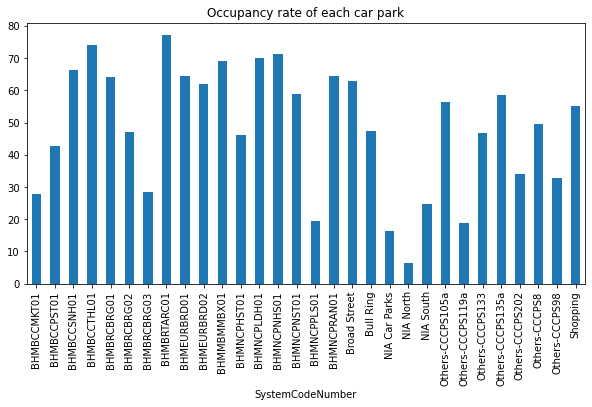

In [16]:
gb_occ.plot.bar(y='OccupationRate', figsize=(10,4.8), title='Occupancy rate of each car park')

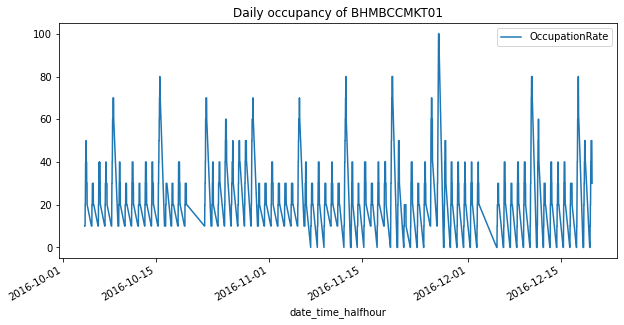

In [17]:
gb.get_group("BHMBCCMKT01").plot.line(y='OccupationRate', x = 'date_time_halfhour', figsize=(10,4.8), title='Daily occupancy of BHMBCCMKT01')

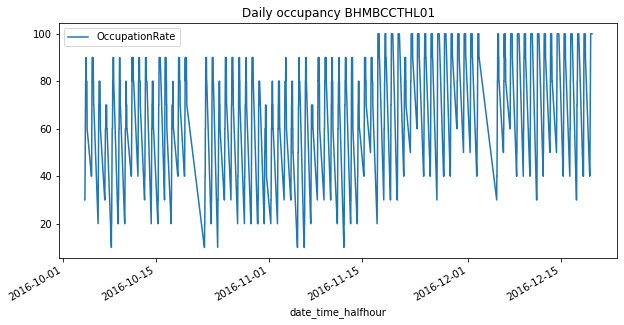

In [18]:
gb.get_group("BHMBCCTHL01").plot.line(y='OccupationRate', x = 'date_time_halfhour', figsize=(10,4.8), title='Daily occupancy BHMBCCTHL01')

In [19]:
join1 = gb.get_group("BHMBCCTHL01")
join1

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,OccupationRate,date,date_time_halfhour,time,ndate_time_halfhour
3882,BHMBCCTHL01,387,120,2016-10-04 07:59:42,30,2016-10-04,2016-10-04 08:00:00,08:00:00,1475568000000000000
3883,BHMBCCTHL01,387,129,2016-10-04 08:25:42,30,2016-10-04,2016-10-04 08:30:00,08:30:00,1475569800000000000
3884,BHMBCCTHL01,387,155,2016-10-04 08:59:42,40,2016-10-04,2016-10-04 09:00:00,09:00:00,1475571600000000000
3885,BHMBCCTHL01,387,204,2016-10-04 09:32:46,50,2016-10-04,2016-10-04 09:30:00,09:30:00,1475573400000000000
3886,BHMBCCTHL01,387,236,2016-10-04 09:59:48,60,2016-10-04,2016-10-04 10:00:00,10:00:00,1475575200000000000
...,...,...,...,...,...,...,...,...,...
5189,BHMBCCTHL01,387,387,2016-12-19 14:30:33,100,2016-12-19,2016-12-19 14:30:00,14:30:00,1482157800000000000
5190,BHMBCCTHL01,387,387,2016-12-19 15:03:34,100,2016-12-19,2016-12-19 15:00:00,15:00:00,1482159600000000000
5191,BHMBCCTHL01,387,387,2016-12-19 15:29:33,100,2016-12-19,2016-12-19 15:30:00,15:30:00,1482161400000000000
5192,BHMBCCTHL01,387,387,2016-12-19 16:03:35,100,2016-12-19,2016-12-19 16:00:00,16:00:00,1482163200000000000


In [20]:
join2 = gb.get_group("BHMBCCMKT01")
join2

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,OccupationRate,date,date_time_halfhour,time,ndate_time_halfhour
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,10,2016-10-04,2016-10-04 08:00:00,08:00:00,1475568000000000000
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,10,2016-10-04,2016-10-04 08:30:00,08:30:00,1475569800000000000
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,10,2016-10-04,2016-10-04 09:00:00,09:00:00,1475571600000000000
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,20,2016-10-04,2016-10-04 09:30:00,09:30:00,1475573400000000000
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,20,2016-10-04,2016-10-04 10:00:00,10:00:00,1475575200000000000
...,...,...,...,...,...,...,...,...,...
1307,BHMBCCMKT01,577,309,2016-12-19 14:30:33,50,2016-12-19,2016-12-19 14:30:00,14:30:00,1482157800000000000
1308,BHMBCCMKT01,577,300,2016-12-19 15:03:34,50,2016-12-19,2016-12-19 15:00:00,15:00:00,1482159600000000000
1309,BHMBCCMKT01,577,274,2016-12-19 15:29:33,50,2016-12-19,2016-12-19 15:30:00,15:30:00,1482161400000000000
1310,BHMBCCMKT01,577,230,2016-12-19 16:03:35,40,2016-12-19,2016-12-19 16:00:00,16:00:00,1482163200000000000


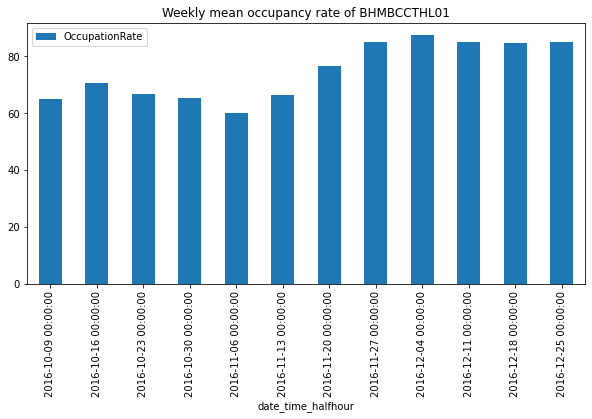

In [21]:
weekly1=join1.groupby(Grouper(key='date_time_halfhour', freq='W')).mean()
weekly1.plot.bar(y='OccupationRate', figsize=(10,4.8), title='Weekly mean occupancy rate of BHMBCCTHL01')

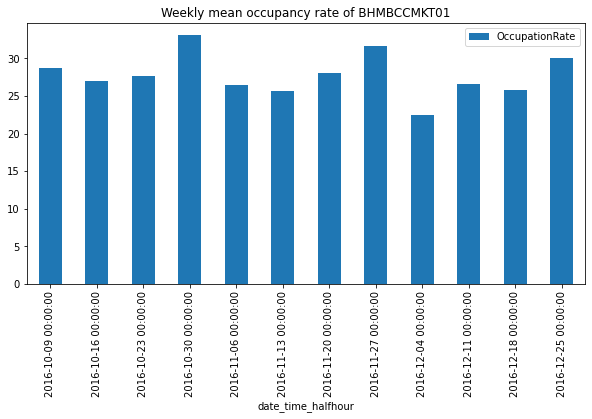

In [22]:
weekly2=join2.groupby(Grouper(key='date_time_halfhour', freq='W')).mean()
weekly2.plot.bar(y='OccupationRate', figsize=(10,4.8), title='Weekly mean occupancy rate of BHMBCCMKT01')

In [23]:
joined = pd.concat([join1, join2])
joined

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,OccupationRate,date,date_time_halfhour,time,ndate_time_halfhour
3882,BHMBCCTHL01,387,120,2016-10-04 07:59:42,30,2016-10-04,2016-10-04 08:00:00,08:00:00,1475568000000000000
3883,BHMBCCTHL01,387,129,2016-10-04 08:25:42,30,2016-10-04,2016-10-04 08:30:00,08:30:00,1475569800000000000
3884,BHMBCCTHL01,387,155,2016-10-04 08:59:42,40,2016-10-04,2016-10-04 09:00:00,09:00:00,1475571600000000000
3885,BHMBCCTHL01,387,204,2016-10-04 09:32:46,50,2016-10-04,2016-10-04 09:30:00,09:30:00,1475573400000000000
3886,BHMBCCTHL01,387,236,2016-10-04 09:59:48,60,2016-10-04,2016-10-04 10:00:00,10:00:00,1475575200000000000
...,...,...,...,...,...,...,...,...,...
1307,BHMBCCMKT01,577,309,2016-12-19 14:30:33,50,2016-12-19,2016-12-19 14:30:00,14:30:00,1482157800000000000
1308,BHMBCCMKT01,577,300,2016-12-19 15:03:34,50,2016-12-19,2016-12-19 15:00:00,15:00:00,1482159600000000000
1309,BHMBCCMKT01,577,274,2016-12-19 15:29:33,50,2016-12-19,2016-12-19 15:30:00,15:30:00,1482161400000000000
1310,BHMBCCMKT01,577,230,2016-12-19 16:03:35,40,2016-12-19,2016-12-19 16:00:00,16:00:00,1482163200000000000


In [24]:
piv_join = joined.pivot(index="date_time_halfhour", columns="SystemCodeNumber", values=["OccupationRate", "ndate_time_halfhour"])
piv_join.head()

OccupationRate              ndate_time_halfhour  \
SystemCodeNumber       BHMBCCMKT01 BHMBCCTHL01          BHMBCCMKT01   
date_time_halfhour                                                    
2016-10-04 08:00:00             10          30  1475568000000000000   
2016-10-04 08:30:00             10          30  1475569800000000000   
2016-10-04 09:00:00             10          40  1475571600000000000   
2016-10-04 09:30:00             20          50  1475573400000000000   
2016-10-04 10:00:00             20          60  1475575200000000000   

                                          
SystemCodeNumber             BHMBCCTHL01  
date_time_halfhour                        
2016-10-04 08:00:00  1475568000000000000  
2016-10-04 08:30:00  1475569800000000000  
2016-10-04 09:00:00  1475571600000000000  
2016-10-04 09:30:00  1475573400000000000  
2016-10-04 10:00:00  1475575200000000000

In [25]:
piv_join.corr()

OccupationRate              \
SystemCodeNumber                        BHMBCCMKT01 BHMBCCTHL01   
                    SystemCodeNumber                              
OccupationRate      BHMBCCMKT01            1.000000    0.631043   
                    BHMBCCTHL01            0.631043    1.000000   
ndate_time_halfhour BHMBCCMKT01           -0.023568    0.332078   
                    BHMBCCTHL01           -0.023568    0.332078   

                                     ndate_time_halfhour              
SystemCodeNumber                             BHMBCCMKT01 BHMBCCTHL01  
                    SystemCodeNumber                                  
OccupationRate      BHMBCCMKT01                -0.023568   -0.023568  
                    BHMBCCTHL01                 0.332078    0.332078  
ndate_time_halfhour BHMBCCMKT01                 1.000000    1.000000  
                    BHMBCCTHL01                 1.000000    1.000000

In [26]:
# Creating test and train models
#using X to predict label Y
X = piv_join.drop([('OccupationRate','BHMBCCMKT01'), ('ndate_time_halfhour', 'BHMBCCMKT01')], axis=1)
y = piv_join[('OccupationRate', 'BHMBCCMKT01')]
# y = y.astype(int)
print(list(piv_join.columns))
y

[('OccupationRate', 'BHMBCCMKT01'), ('OccupationRate', 'BHMBCCTHL01'), ('ndate_time_halfhour', 'BHMBCCMKT01'), ('ndate_time_halfhour', 'BHMBCCTHL01')]


date_time_halfhour
2016-10-04 08:00:00    10
2016-10-04 08:30:00    10
2016-10-04 09:00:00    10
2016-10-04 09:30:00    20
2016-10-04 10:00:00    20
                       ..
2016-12-19 14:30:00    50
2016-12-19 15:00:00    50
2016-12-19 15:30:00    50
2016-12-19 16:00:00    40
2016-12-19 16:30:00    30
Name: (OccupationRate, BHMBCCMKT01), Length: 1307, dtype: int64

In [27]:
# train test split 1
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,test_size=0.5, random_state = 10)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import r2_score
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
from sklearn.metrics import explained_variance_score

In [29]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTR', tree.DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor(max_depth = 20, min_samples_split=2, n_estimators = 100, random_state = 1)))

In [30]:
nfolds=10
i=0
results = []
for name, model in models:
    kf = KFold(n_splits=nfolds)
    score = cross_val_score(model, X_train, y_train, cv=nfolds, scoring= 'neg_root_mean_squared_error')
    score2 = cross_val_score(model, X_train, y_train, cv=nfolds, scoring= 'r2')
    score3 = cross_val_score(model, X_train, y_train, cv=nfolds, scoring= 'neg_mean_absolute_error')
    results.append((name, score))
    if score.mean() > i:
        imodel=model
        i=score.mean()
    print(name, score.mean(), score2.mean(), score3.mean())
print("Done")

LR -13.049048584652216 0.43578369756897556 -9.486231857357321
KNN -12.62362955893799 0.43932246998194097 -9.516643356643357
DTR -8.105422019955883 0.7685290756944976 -4.76107226107226
RF -7.364385584523117 0.8056481021863469 -5.154314685314685
Done


In [31]:
models = []
models.append(('RF 1', RandomForestRegressor(max_depth = 10, min_samples_split=2, n_estimators = 50, random_state = 1)))
models.append(('RF 2', RandomForestRegressor(max_depth = 20, min_samples_split=2, n_estimators = 50, random_state = 2)))
models.append(('RF 3', RandomForestRegressor(max_depth = 30, min_samples_split=2, n_estimators = 50, random_state = 3)))

nfolds=10
i=0
results = []
for name, model in models:
    kf = KFold(n_splits=nfolds)
    score = cross_val_score(model, X_train, y_train, cv=nfolds, scoring= 'neg_root_mean_squared_error')
    results.append((name, score))
    if score.mean() > i:
        imodel=model
        i=score.mean()
    print(name, score.mean())
print("Done")

RF 1 -7.692723542136919
RF 2 -7.313285554359375
RF 3 -7.374177563091071
Done


In [32]:
models = []
models.append(('RF 2.1', RandomForestRegressor(max_depth = 20, min_samples_split=2, n_estimators = 50, random_state = 1)))
models.append(('RF 2.2', RandomForestRegressor(max_depth = 20, min_samples_split=2, n_estimators = 100, random_state = 2)))
models.append(('RF 2.3', RandomForestRegressor(max_depth = 20, min_samples_split=2, n_estimators = 150, random_state = 2)))

nfolds=10
i=0
results = []
for name, model in models:
    kf = KFold(n_splits=nfolds)
    score = cross_val_score(model, X_train, y_train, cv=nfolds, scoring= 'neg_root_mean_squared_error')
    results.append((name, score))
    if score.mean() > i:
        imodel=model
        i=score.mean()
    print(name, score.mean())
print("Done")

RF 2.1 -7.397981243204822
RF 2.2 -7.321812170032183
RF 2.3 -7.3181418205531825
Done


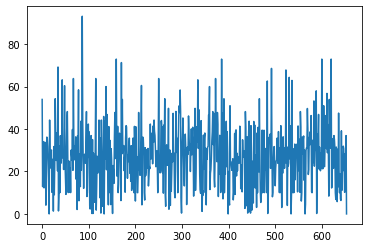

Mean Absolute Error (MAE) : 5.153866270512699
Root Mean Squared Error (RMSE) : 7.320795165109317
r2 Score : 0.8222928694459667


In [33]:
#First RF model

clf=RandomForestRegressor(max_depth = 10, min_samples_split=2, n_estimators = 50, random_state = 10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

plt.plot(y_pred)
plt.show()

print("Mean Absolute Error (MAE) : {}".format(mean_absolute_error(y_test, y_pred)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y_test, y_pred)))
print("r2 Score : {}".format(r2_score(y_test, y_pred,multioutput='variance_weighted')))

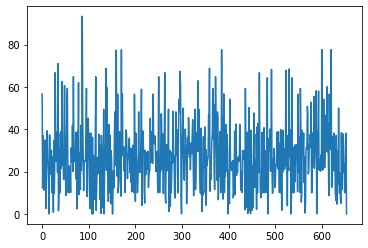

27.365800203873597
Mean Absolute Error (MAE) : 4.635830784913353
Root Mean Squared Error (RMSE) : 6.650042601270221
r2 score : 0.8533651503346815


In [34]:
clf=RandomForestRegressor(max_depth = 20, min_samples_split=2, n_estimators = 100, random_state = 20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

plt.plot(y_pred)
plt.show()

print(y_pred.mean())
print("Mean Absolute Error (MAE) : {}".format(mean_absolute_error(y_test, y_pred)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y_test, y_pred)))
print("r2 score : {}".format(r2_score(y_test, y_pred,multioutput='variance_weighted')))

In [35]:
# train test split 1
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2, random_state = 20)

In [36]:
clf=RandomForestRegressor(max_depth = 20, min_samples_split=2, n_estimators = 100, random_state = 20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(y_pred.mean())
print("Mean Absolute Error (MAE) : {}".format(mean_absolute_error(y_test, y_pred)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y_test, y_pred)))
print("r2 score : {}".format(r2_score(y_test, y_pred,multioutput='variance_weighted')))

27.556078698655032
Mean Absolute Error (MAE) : 4.153272446383133
Root Mean Squared Error (RMSE) : 5.959960309359441
r2 score : 0.8786740324931772


In [37]:
# Creating test and train models
#using X to predict label Y
X = piv_join.drop([('OccupationRate','BHMBCCTHL01'), ('ndate_time_halfhour', 'BHMBCCTHL01')], axis=1)
y = piv_join[('OccupationRate', 'BHMBCCTHL01')]
# y = y.astype(int)
print(list(piv_join.columns))
y

[('OccupationRate', 'BHMBCCMKT01'), ('OccupationRate', 'BHMBCCTHL01'), ('ndate_time_halfhour', 'BHMBCCMKT01'), ('ndate_time_halfhour', 'BHMBCCTHL01')]


date_time_halfhour
2016-10-04 08:00:00     30
2016-10-04 08:30:00     30
2016-10-04 09:00:00     40
2016-10-04 09:30:00     50
2016-10-04 10:00:00     60
                      ... 
2016-12-19 14:30:00    100
2016-12-19 15:00:00    100
2016-12-19 15:30:00    100
2016-12-19 16:00:00    100
2016-12-19 16:30:00    100
Name: (OccupationRate, BHMBCCTHL01), Length: 1307, dtype: int64

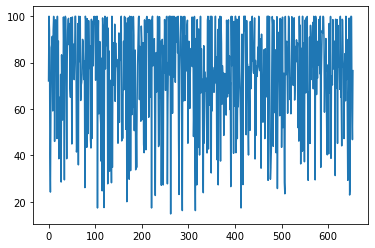

74.65683574674729
Mean Absolute Error (MAE) : 6.765090461852929
Root Mean Squared Error (RMSE) : 9.619836280600111
r2 score : 0.8353128393567983


In [38]:
# train test split 2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,test_size=0.5, random_state = 30)


clf=RandomForestRegressor(max_depth = 10, min_samples_split=2, n_estimators = 50, random_state = 4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

plt.plot(y_pred)
plt.show()

print(y_pred.mean())
print("Mean Absolute Error (MAE) : {}".format(mean_absolute_error(y_test, y_pred)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y_test, y_pred)))
print("r2 score : {}".format(r2_score(y_test, y_pred,multioutput='variance_weighted')))

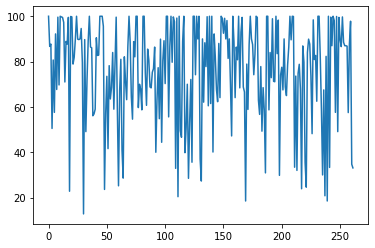

75.8030534351145
Mean Absolute Error (MAE) : 5.31145038167939
Root Mean Squared Error (RMSE) : 8.113009061410837
r2 score : 0.8617544263749713


In [39]:
# train test split 3
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2, random_state = 42)

clf=RandomForestRegressor(max_depth = 20, min_samples_split=2, n_estimators = 100, random_state = 4)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

plt.plot(y_pred)
plt.show()
print(y_pred.mean())

print("Mean Absolute Error (MAE) : {}".format(mean_absolute_error(y_test, y_pred)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y_test, y_pred)))
print("r2 score : {}".format(r2_score(y_test, y_pred,multioutput='variance_weighted')))